# **Fisher Discriminant**


## **Import Libraries** 





In [0]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from skimage import measure

import warnings
warnings.filterwarnings("ignore") # Added this at the end to show a clean output with no warnings but not necessary 

Using TensorFlow backend.


## **Load data**

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x0 = x_train[y_train==0,:,:]
x1 = x_train[y_train==1,:,:]
x5 = x_train[y_train==5,:,:]
x6 = x_train[y_train==6,:,:]
len_x0 = len(x0)
len_x1 = len(x1)
len_x5 = len(x5)
len_x6 = len(x6)

## **Plot average images of 0's and 1's** 

Text(0.5, 1.0, 'Thresholded image of 1')

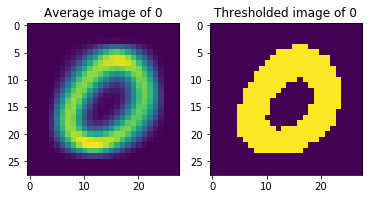

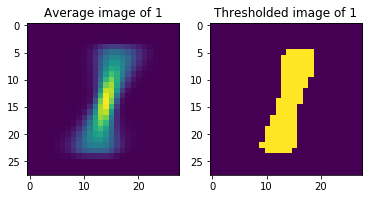

In [0]:
m0 = np.mean(x0, axis=0) 
m1 = np.mean(x1, axis=0)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(m0)
plt.title('Average image of 0')

mt0 = 1*(m0 > 60) # Thresholding
plt.subplot(1,2,2)
plt.imshow(mt0)
plt.title('Thresholded image of 0')

plt.figure()
plt.subplot(1,2,1)
plt.imshow(m1)
plt.title('Average image of 1')

mt1 = 1*(m1 > 60) # Thresholding
plt.subplot(1,2,2)
plt.imshow(mt1)
plt.title('Thresholded image of 1')

## **Regionprops** 

In [0]:
print('Properties of zero number images')
mt0_props = measure.regionprops(mt0)
num_regions0 = len(mt0_props)
print(str(num_regions0)+' region/s were found')
print('')

print('Area (in pixels):')
area0 = mt0_props[0].area # Remember, index 0 is the first region found
print(area0)
print('')

print('Perimeter (in pixels):')
perimeter0 = mt0_props[0].perimeter
print(perimeter0)
print('')

print('Centroid (pixel coordinates):')
centroid0 = mt0_props[0].centroid
print(centroid0)

print('Eccentricity:')
eccentricity0 = mt0_props[0].eccentricity
print(eccentricity0)
print('')

print('Minor axis length:')
minor_axis0 = mt0_props[0].minor_axis_length
print(minor_axis0)
print('')
print('')
print('Now with ones')
mt1_props = measure.regionprops(mt1)
num_regions1 = len(mt1_props)
print(str(num_regions1)+' region/s were found')
print('')

print('Area (in pixels):')
area1 = mt1_props[0].area 
print(area1)
print('')

print('Perimeter (in pixels):')
perimeter1 = mt1_props[0].perimeter
print(perimeter1)
print('')

print('Centroid (pixel coordinates):')
centroid1 = mt1_props[0].centroid
print(centroid1)

print('Eccentricity:')
eccentricity1 = mt1_props[0].eccentricity
print(eccentricity1)
print('')

print('Minor axis length:')
minor_axis1 = mt1_props[0].minor_axis_length
print(minor_axis1)
print('')

Properties of zero number images
1 region/s were found

Area (in pixels):
237

Perimeter (in pixels):
93.74011537017762

Centroid (pixel coordinates):
(13.978902953586498, 14.080168776371307)
Eccentricity:
0.6181813464414365

Minor axis length:
18.53176476195907


Now with ones
1 region/s were found

Area (in pixels):
100

Perimeter (in pixels):
48.14213562373095

Centroid (pixel coordinates):
(14.08, 13.95)
Eccentricity:
0.965964935004834

Minor axis length:
6.075181761985079



## **Feature selection**

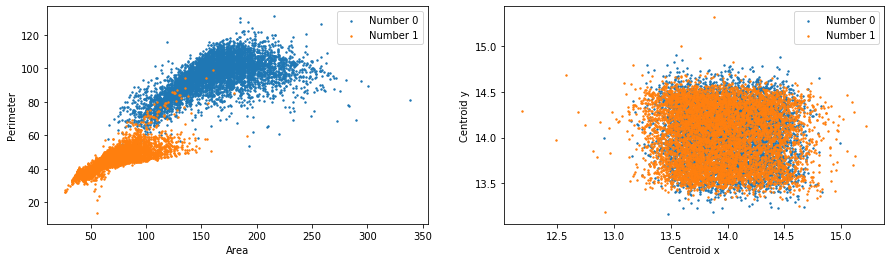

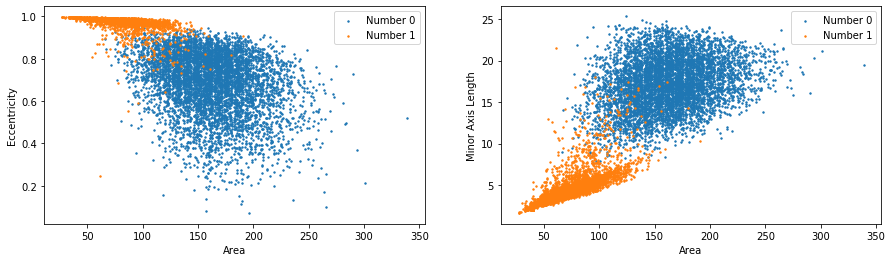

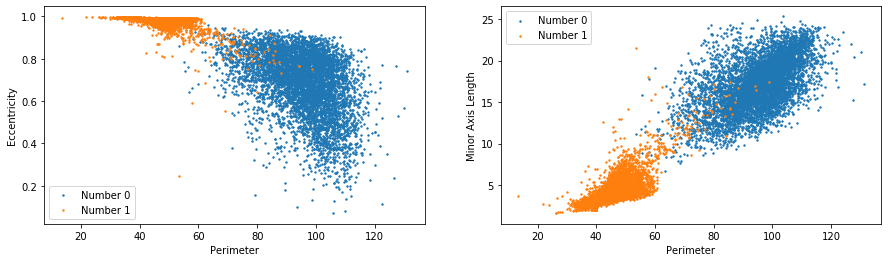

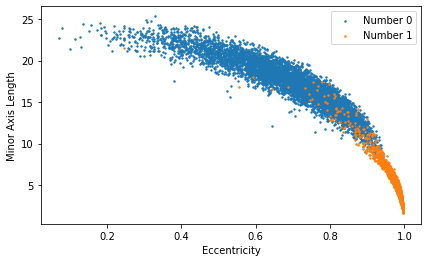

In [0]:
# Threshold images
t0 = 1*(x0 > 60)
t1 = 1*(x1 > 60)

# Region properties
area0 = np.zeros(t0.shape[0])
perimeter0 = np.zeros(t0.shape[0])
centroid0x = np.zeros(t0.shape[0])
centroid0y = np.zeros(t0.shape[0])
eccentricity0 = np.zeros(t0.shape[0])
minor_axis0 = np.zeros(t0.shape[0])

for i in range(0,t0.shape[0]):
  props = measure.regionprops(t0[i,:,:])
  area0[i] = props[0].area
  perimeter0[i] = props[0].perimeter
  centroid0x[i] = props[0].centroid[0]
  centroid0y[i] = props[0].centroid[1]
  eccentricity0[i]=props[0].eccentricity
  minor_axis0[i] = props[0].minor_axis_length
  
area1 = np.zeros(t1.shape[0])
perimeter1 = np.zeros(t1.shape[0])
centroid1x = np.zeros(t1.shape[0])
centroid1y = np.zeros(t1.shape[0])
eccentricity1 = np.zeros(t1.shape[0])
minor_axis1 = np.zeros(t1.shape[0])

for i in range(0,t1.shape[0]):
  props = measure.regionprops(t1[i,:,:])
  area1[i] = props[0].area
  perimeter1[i] = props[0].perimeter
  centroid1x[i] = props[0].centroid[0]
  centroid1y[i] = props[0].centroid[1]
  eccentricity1[i]=props[0].eccentricity
  minor_axis1[i] = props[0].minor_axis_length
 
#Plot area/perimeter
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.scatter(area0,perimeter0, label='Number 0',s=2)
plt.scatter(area1,perimeter1, label='Number 1',s=2)
plt.xlabel('Area')
plt.ylabel('Perimeter')
plt.legend()

#Plot centroid
plt.subplot(1,2,2)
plt.scatter(centroid0x,centroid0y, label='Number 0',s=2)
plt.scatter(centroid1x,centroid1y, label='Number 1',s=2)
plt.xlabel('Centroid x')
plt.ylabel('Centroid y')
plt.legend()

# Plot area/eccentricity
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.scatter(area0,eccentricity0, label='Number 0',s=2)
plt.scatter(area1,eccentricity1, label='Number 1',s=2)
plt.xlabel('Area')
plt.ylabel('Eccentricity')
plt.legend()

# Plot area/minor axis
plt.subplot(1,2,2)
plt.scatter(area0,minor_axis0, label='Number 0',s=2)
plt.scatter(area1,minor_axis1, label='Number 1',s=2)
plt.xlabel('Area')
plt.ylabel('Minor Axis Length')
plt.legend()

# Plot perimeter/eccentricity
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.scatter(perimeter0,eccentricity0, label='Number 0',s=2)
plt.scatter(perimeter1,eccentricity1, label='Number 1',s=2)
plt.xlabel('Perimeter')
plt.ylabel('Eccentricity')
plt.legend()

# Plot perimeter/minor axis
plt.subplot(1,2,2)
plt.scatter(perimeter0,minor_axis0, label='Number 0',s=2)
plt.scatter(perimeter1,minor_axis1, label='Number 1',s=2)
plt.xlabel('Perimeter')
plt.ylabel('Minor Axis Length')
plt.legend()

# Plot eccentricity/minor axis
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.scatter(eccentricity0,minor_axis0, label='Number 0',s=2)
plt.scatter(eccentricity1,minor_axis1, label='Number 1',s=2)
plt.xlabel('Eccentricity')
plt.ylabel('Minor Axis Length')
plt.legend()

## **Creation of the model**

In [0]:
mean_area0 = np.mean(area0)
mean_perimeter0 = np.mean(perimeter0)

mean_area1 = np.mean(area1)
mean_perimeter1 = np.mean(perimeter1)

feature_means0 = np.transpose([mean_area0, mean_perimeter0])
feature_means1 = np.transpose([mean_area1, mean_perimeter1]) 

x0_features= np.transpose([area0,perimeter0])
x1_features = np.transpose([area1,perimeter1])


In [0]:

def matrix_creator(x,y):
  m = np.zeros((len(x), len(y)))
  for i in range(len(x)):
    for j in range(len(y)):
      m[i][j] = x[i]*y[j]     
  
  return m 

def scatter_matrix(x, mean):
  sum = 0
  for i in range(len(x)):
    sum = sum + matrix_creator((x[i] - mean), (x[i] - mean))
  
  return sum

# Inner_prod x'*y ; by np.transpose the matrix is not making the inner product
def inner_prod(x,y):
  res = 0
  
  if len(x) == len(y):
    for i in range(len(x)):
      res = res + x[i]*y[i] 
    return res   
  else:
    return -1

# Do matrix times a vector
def matrix_vector_mult(m, x):
  res = np.zeros((len(x), 1))
  for i in range(len(m)):
    for j in range(len(m)):
      res[i] = res[i] + m[i][j]*x[i]
  return res
    
s0 = scatter_matrix(x0_features, feature_means0)
s1 = scatter_matrix(x1_features, feature_means1)

Sw = s0 + s1
Sb = matrix_creator(feature_means0,feature_means1) 

W = np.dot(np.linalg.inv(Sw), (feature_means0-feature_means1))
print(W)

# Objective function J should be almost zero
J = np.dot(W, matrix_vector_mult(Sb, W)) / (inner_prod(W, matrix_vector_mult(Sw, W)))
print(J)





[-1.34037701e-06  5.57168718e-05]
[0.00403393]


0.003766074644760929


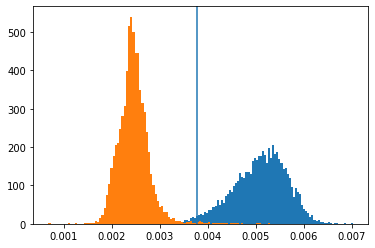

In [0]:
# Calculations of threshold
T = np.mean([np.mean(np.dot(W,x0_features.T)), np.mean(np.dot(W, x1_features.T))])
print(T)


# Creation of the histogram

hist = plt.hist(np.dot(W,x0_features.T), bins= 100)
hist = plt.hist(np.dot(W,x1_features.T), bins = 100)
plt.axvline(x=T)


## **Solution analysis**

In [0]:
projection0 = np.dot(W, x0_features.T)
wrong_count0 = np.size(projection0 > T) - np.count_nonzero(projection0 > T) 
print('Zero predictions')     
print(wrong_count0, 'errors out of ', len_x0,)
print('Error fraction: ', wrong_count0/len_x0)
print('Accuracy: ', (len_x0-wrong_count0)/len_x0 )
print('')

projection1 = np.dot(W, x1_features.T)
wrong_count1 = np.size(projection1 < T) - np.count_nonzero(projection1 < T)
print('One predictions')
print(wrong_count1, 'errors out of ', len_x1)
print('Error fraction: ', wrong_count1/len_x1)
print('Accuracy: ', (len_x1-wrong_count1)/len_x1)
print('')


print('Total predictions')
print(wrong_count0+wrong_count1, 'errors out of ', len_x0+len_x1)
print('Error fraction: ', (wrong_count0+wrong_count1)/(len_x0+len_x1))
print('Accuracy: ', ((len_x0+len_x1)-(wrong_count0+wrong_count1))/(len_x0+len_x1))

Zero predictions
115 errors out of  5923
Error fraction:  0.019415836569306094
Accuracy:  0.9805841634306939

One predictions
51 errors out of  6742
Error fraction:  0.007564520913675467
Accuracy:  0.9924354790863246

Total predictions
166 errors out of  12665
Error fraction:  0.013106987761547572
Accuracy:  0.9868930122384524


## **Testing dataset**

In [0]:

x0_test = x_test[y_test==0,:,:]
x1_test = x_test[y_test==1,:,:]
len_x0_test = len(x0_test)
len_x1_test = len(x1_test)

t0_test = 1*(x0_test > 60)
t1_test = 1*(x1_test > 60)

# Region properties
area0 = np.zeros(t0_test.shape[0])
perimeter0 = np.zeros(t0_test.shape[0])
eccentricity0 = np.zeros(t0_test.shape[0])

for i in range(0,t0_test.shape[0]):
  props = measure.regionprops(t0_test[i,:,:])
  area0[i] = props[0].area
  perimeter0[i] = props[0].perimeter
  eccentricity0[i]=props[0].eccentricity
  
area1 = np.zeros(t1_test.shape[0])
perimeter1 = np.zeros(t1_test.shape[0])
eccentricity1 = np.zeros(t1_test.shape[0])

for i in range(0,t1_test.shape[0]):
  props = measure.regionprops(t1_test[i,:,:])
  area1[i] = props[0].area
  perimeter1[i] = props[0].perimeter
  eccentricity1[i]=props[0].eccentricity

x0_test_features = np.transpose([area0,perimeter0])
x1_test_features = np.transpose([area1,perimeter1])


projection0 = np.dot(W, x0_test_features.T)
wrong_count0 = np.size(projection0 > T) - np.count_nonzero(projection0 > T) 
print('In testing dataset')
print('Zero predictions')     
print(wrong_count0, 'errors out of ', len_x0_test,)
print('Error fraction: ', wrong_count0/len_x0_test)
print('Accuracy: ', (len_x0_test-wrong_count0)/len_x0_test )
print('')

projection1 = np.dot(W, x1_test_features.T)
wrong_count1 = np.size(projection1 < T) - np.count_nonzero(projection1 < T) 

print('One predictions')     
print(wrong_count1, 'errors out of ', len_x1_test,)
print('Error fraction: ', wrong_count1/len_x1_test)
print('Accuracy: ', (len_x1_test-wrong_count1)/len_x1_test )
print('')


print('Total predictions')
print(wrong_count0+wrong_count1, 'errors out of ', len_x0_test + len_x1_test)
print('Error fraction: ', (wrong_count0 + wrong_count1)/(len_x0_test + len_x1_test))
print('Accuracy: ', ((len_x0_test + len_x1_test) - (wrong_count0 + wrong_count1))/(len_x0_test + len_x1_test))


In testing dataset
Zero predictions
14 errors out of  980
Error fraction:  0.014285714285714285
Accuracy:  0.9857142857142858

One predictions
5 errors out of  1135
Error fraction:  0.004405286343612335
Accuracy:  0.9955947136563876

Total predictions
19 errors out of  2115
Error fraction:  0.008983451536643027
Accuracy:  0.991016548463357


# **Classification of numbers 5 and 6**

## **Plotting**

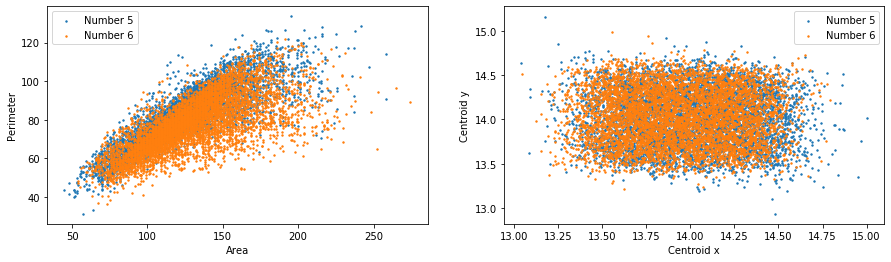

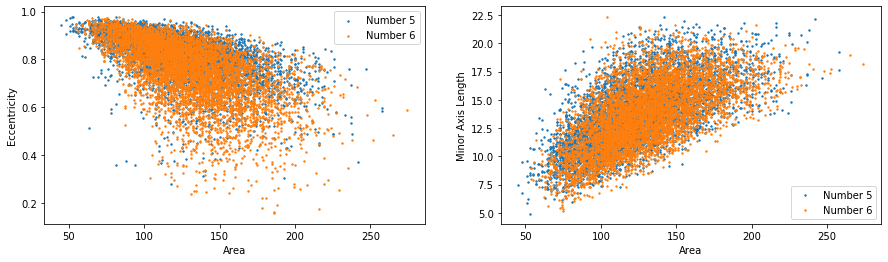

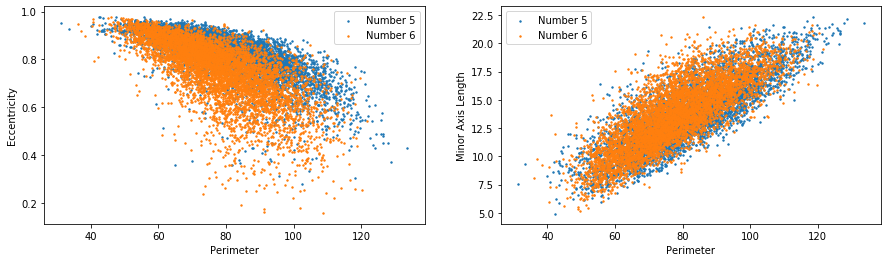

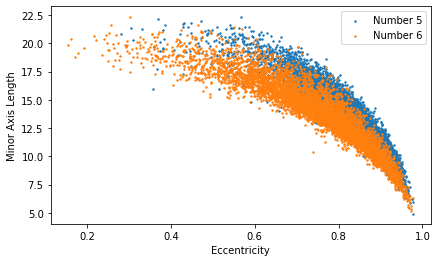

In [0]:
# Threshold images
t5 = 1*(x5 > 60)
t6 = 1*(x6 > 60)

# Region properties
area5 = np.zeros(t5.shape[0])
perimeter5 = np.zeros(t5.shape[0])
centroid5x = np.zeros(t5.shape[0])
centroid5y = np.zeros(t5.shape[0])
eccentricity5 = np.zeros(t5.shape[0])
minor_axis5 = np.zeros(t5.shape[0])

for i in range(0,t5.shape[0]):
  props = measure.regionprops(t5[i,:,:])
  area5[i] = props[0].area
  perimeter5[i] = props[0].perimeter
  centroid5x[i] = props[0].centroid[0]
  centroid5y[i] = props[0].centroid[1]
  eccentricity5[i]=props[0].eccentricity
  minor_axis5[i] = props[0].minor_axis_length
  
area6 = np.zeros(t6.shape[0])
perimeter6 = np.zeros(t6.shape[0])
centroid6x = np.zeros(t6.shape[0])
centroid6y = np.zeros(t6.shape[0])
eccentricity6 = np.zeros(t6.shape[0])
minor_axis6 = np.zeros(t6.shape[0])

for i in range(0,t6.shape[0]):
  props = measure.regionprops(t6[i,:,:])
  area6[i] = props[0].area
  perimeter6[i] = props[0].perimeter
  centroid6x[i] = props[0].centroid[0]
  centroid6y[i] = props[0].centroid[1]
  eccentricity6[i]=props[0].eccentricity
  minor_axis6[i] = props[0].minor_axis_length
 
#Plot area/perimeter
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.scatter(area5,perimeter5, label='Number 5',s=2)
plt.scatter(area6,perimeter6, label='Number 6',s=2)
plt.xlabel('Area')
plt.ylabel('Perimeter')
plt.legend()

#Plot centroid
plt.subplot(1,2,2)
plt.scatter(centroid5x,centroid5y, label='Number 5',s=2)
plt.scatter(centroid6x,centroid6y, label='Number 6',s=2)
plt.xlabel('Centroid x')
plt.ylabel('Centroid y')
plt.legend()

# Plot area/eccentricity
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.scatter(area5,eccentricity5, label='Number 5',s=2)
plt.scatter(area6,eccentricity6, label='Number 6',s=2)
plt.xlabel('Area')
plt.ylabel('Eccentricity')
plt.legend()

# Plot area/minor axis
plt.subplot(1,2,2)
plt.scatter(area5,minor_axis5, label='Number 5',s=2)
plt.scatter(area6,minor_axis6, label='Number 6',s=2)
plt.xlabel('Area')
plt.ylabel('Minor Axis Length')
plt.legend()

# Plot perimeter/eccentricity
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.scatter(perimeter5,eccentricity5, label='Number 5',s=2)
plt.scatter(perimeter6,eccentricity6, label='Number 6',s=2)
plt.xlabel('Perimeter')
plt.ylabel('Eccentricity')
plt.legend()

# Plot perimeter/minor axis
plt.subplot(1,2,2)
plt.scatter(perimeter5,minor_axis5, label='Number 5',s=2)
plt.scatter(perimeter6,minor_axis6, label='Number 6',s=2)
plt.xlabel('Perimeter')
plt.ylabel('Minor Axis Length')
plt.legend()

# Plot eccentricity/minor axis
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.scatter(eccentricity5,minor_axis5, label='Number 5',s=2)
plt.scatter(eccentricity6,minor_axis6, label='Number 6',s=2)
plt.xlabel('Eccentricity')
plt.ylabel('Minor Axis Length')
plt.legend()





## **Creation of the model**

In [0]:
"""
feature1_5=area5
feature1_6=area6
feature2_5=perimeter5
feature2_6=perimeter6

feature1_5=eccentricity5
feature1_6=eccentricity6
feature2_5=minor_axis5
feature2_6=minor_axis6
"""
feature1_5=eccentricity5
feature1_6=eccentricity6
feature2_5=perimeter5
feature2_6=perimeter6

mean_feature1_5 = np.mean(feature1_5)
mean_feature2_5 = np.mean(feature2_5)

mean_feature1_6 = np.mean(feature1_6)
mean_feature2_6 = np.mean(feature2_6)


feature_means5 = np.transpose([mean_feature1_5, mean_feature2_5])
feature_means6 = np.transpose([mean_feature1_6, mean_feature2_6]) 

x5_features = np.transpose([feature1_5,feature2_5])
x6_features = np.transpose([feature1_6,feature2_6])


In [0]:
def matrix_creator(x,y):
  m = np.zeros((len(x), len(y)))
  for i in range(len(x)):
    for j in range(len(y)):
      m[i][j] = x[i]*y[j]     
  
  return m 

def scatter_matrix(x, mean):
  sum = 0
  for i in range(len(x)):
    sum = sum + matrix_creator((x[i] - mean), (x[i] - mean))
  
  return sum

# Inner_prod x'*y ; by np.transpose the matrix is not making the inner product
def inner_prod(x,y):
  res = 0
  
  if len(x) == len(y):
    for i in range(len(x)):
      res = res + x[i]*y[i] 
    return res   
  else:
    return -1

    # Do matrix times a vector
def matrix_vector_mult(m, x):
  res = np.zeros((len(x), 1))
  for i in range(len(m)):
    for j in range(len(m)):
      res[i] = res[i] + m[i][j]*x[i]
  return res
    
s5 = scatter_matrix(x5_features, feature_means5)
s6 = scatter_matrix(x6_features, feature_means6)

Sw = s5 + s6
Sb = matrix_creator(feature_means5,feature_means6) 

W = np.dot(np.linalg.inv(Sw), (feature_means5-feature_means6))
print(W)

# Objective function J should be almost zero
J = np.dot(W, matrix_vector_mult(Sb, W)) / (inner_prod(W, matrix_vector_mult(Sw, W)))
print(J)



[1.04999598e-03 7.54031623e-06]
[-0.00518391]


0.0014255956672146036


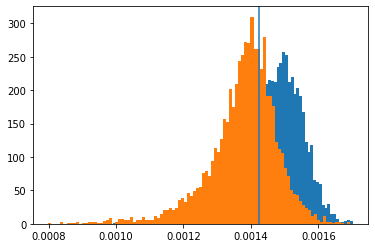

In [0]:
# Calculations of threshold
T = np.mean([np.mean(np.dot(W,x5_features.T)), np.mean(np.dot(W, x6_features.T))])
print(T)


# Creation of the histogram

hist = plt.hist(np.dot(W,x5_features.T), bins= 100)
hist = plt.hist(np.dot(W,x6_features.T), bins = 100)
plt.axvline(x=T)


## **Solution analysis**

In [0]:
projection5 = np.dot(W, x5_features.T)
wrong_count5 = np.size(projection5 > T) - np.count_nonzero(projection5 > T) 
print('Zero predictions')     
print(wrong_count5, 'errors out of ', len_x5,)
print('Error fraction: ', wrong_count5/len_x5)
print('Accuracy: ', (len_x5-wrong_count5)/len_x5 )
print('')

projection6 = np.dot(W, x6_features.T)
wrong_count6 = np.size(projection6 < T) - np.count_nonzero(projection6 < T)
print('One predictions')
print(wrong_count6, 'errors out of ', len_x6)
print('Error fraction: ', wrong_count6/len_x6)
print('Accuracy: ', (len_x6-wrong_count6)/len_x6)
print('')


print('Total predictions')
print(wrong_count5+wrong_count6, 'errors out of ', len_x5+len_x6)
print('Error fraction: ', (wrong_count5+wrong_count6)/(len_x5+len_x6))
print('Accuracy: ', ((len_x5+len_x6)-(wrong_count5+wrong_count6))/(len_x5+len_x6))

Zero predictions
1337 errors out of  5421
Error fraction:  0.2466334624608006
Accuracy:  0.7533665375391994

One predictions
1877 errors out of  5918
Error fraction:  0.3171679621493748
Accuracy:  0.6828320378506252

Total predictions
3214 errors out of  11339
Error fraction:  0.2834465120380986
Accuracy:  0.7165534879619014


## **Testing dataset**

In [0]:
x5_test = x_test[y_test==5,:,:]
x6_test = x_test[y_test==6,:,:]
len_x5_test = len(x5_test)
len_x6_test = len(x6_test)

t5_test = 1*(x5_test > 60)
t6_test = 1*(x6_test > 60)

# Region properties
area5 = np.zeros(t5_test.shape[0])
perimeter5 = np.zeros(t5_test.shape[0])
eccentricity5 = np.zeros(t5_test.shape[0])
minor_axis5 = np.zeros(t5_test.shape[0])



for i in range(0,t5_test.shape[0]):
  props = measure.regionprops(t5_test[i,:,:])
  area5[i] = props[0].area
  perimeter5[i] = props[0].perimeter
  eccentricity5[i]=props[0].eccentricity
  minor_axis5[i] = props[0].minor_axis_length
  
area6 = np.zeros(t6_test.shape[0])
perimeter6 = np.zeros(t6_test.shape[0])
eccentricity6 = np.zeros(t6_test.shape[0])
minor_axis6 = np.zeros(t6_test.shape[0])

for i in range(0,t6_test.shape[0]):
  props = measure.regionprops(t6_test[i,:,:])
  area6[i] = props[0].area
  perimeter6[i] = props[0].perimeter
  eccentricity6[i]=props[0].eccentricity
  minor_axis6[i] = props[0].minor_axis_length

feature1_5=eccentricity5
feature1_6=eccentricity6
feature2_5=perimeter5
feature2_6=perimeter6

x5_test_features = np.transpose([feature1_5,feature2_5])
x6_test_features = np.transpose([feature1_6,feature2_6])


projection5 = np.dot(W, x5_test_features.T)
wrong_count5 = np.size(projection5 > T) - np.count_nonzero(projection5 > T) 
print('In testing dataset')
print('Zero predictions')     
print(wrong_count5, 'errors out of ', len_x5_test,)
print('Error fraction: ', wrong_count5/len_x5_test)
print('Accuracy: ', (len_x5_test-wrong_count5)/len_x5_test )
print('')

projection6 = np.dot(W, x6_test_features.T)
wrong_count6 = np.size(projection6 < T) - np.count_nonzero(projection6 < T) 

print('One predictions')     
print(wrong_count6, 'errors out of ', len_x6_test,)
print('Error fraction: ', wrong_count6/len_x6_test)
print('Accuracy: ', (len_x6_test-wrong_count6)/len_x6_test )
print('')


print('Total predictions')
print(wrong_count5+wrong_count6, 'errors out of ', len_x5_test + len_x6_test)
print('Error fraction: ', (wrong_count5 + wrong_count6)/(len_x5_test + len_x6_test))
print('Accuracy: ', ((len_x5_test + len_x6_test) - (wrong_count5 + wrong_count6))/(len_x5_test + len_x6_test))


In testing dataset
Zero predictions
216 errors out of  892
Error fraction:  0.242152466367713
Accuracy:  0.757847533632287

One predictions
305 errors out of  958
Error fraction:  0.31837160751565763
Accuracy:  0.6816283924843424

Total predictions
521 errors out of  1850
Error fraction:  0.28162162162162163
Accuracy:  0.7183783783783784
